# Homework 5
## BUSN 41204 - 2023

- Aman Krishna
- Christian Pavilanis
- Jingwen Li
- Yazmin Ramirez Delgado

In [43]:
import numpy as np
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from prettytable import PrettyTable
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf

## Question 1
Smart health and fitness monitoring devices (for example, created by FitBit, Nike, Adidas, Misfit Shine, . . . ) are very popular. They are also useful for analyzing person’s daily physical activities and recommending health-enhancing exercises. At their core, how do these devices work? Before analyzing human activities, the first thing the device needs to do is to recognize which activities are being performed in the first place. <br>

This experiment1 monitors people carrying Samsung Galaxy smartphones. Measurements are collected using the phones’ accelerometers and gyroscopes, while subjects perform 6 different activites:
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS • SITTING
- STANDING
- LAYING

Your task is to classify person’s activity based on the phones recordings. <br>
The preprocessed data has been cleaned and normalized, so you are not expected to do any further cleaning. <br>
load('HumanActivityRecognition.RData')

### Your tasks:
## 1. Build a Neural Network model to classify the 6 activity patterns and report your Accuracy on the Test set


#### Loading the RData file on python using pyreadr

In [3]:
# Load RData file
data = pyreadr.read_r('HumanActivityRecognition.RData')

X_train, y_train = data['Xtrain'], data['Ytrain']
X_test, y_test = data['Xtest'], data['Ytest']

#### Setting index columns

In [4]:
X_train.set_index('X', inplace=True)
X_test.set_index('X', inplace=True)
y_train.set_index('X', inplace=True)
y_test.set_index('X', inplace=True)

#### Converting the labels to categorical variables and then one-hot encoding them

In [5]:
# Convert activity labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a dictionary to map encoded labels to original labels
label_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))


# Convert integer labels to one-hot encoded vectors
y_train_onehot = np_utils.to_categorical(y_train_encoded)
y_test_onehot = np_utils.to_categorical(y_test_encoded)


#### Implementing the Neural Network model using Keras Sequential API and printing the Accuracy on the Test set

#### Neural Network model setup and parameters used
> **Sequential()**: This creates an instance of the Keras sequential model.
> 
> **Dense(64, input_dim=X_train.shape[1], activation='relu')**: This adds a fully connected layer with **64 neurons** to the model. **input_dim** specifies the number of input features (i.e., the number of columns in the X_train array). <br>
> **activation='relu'** specifies the ReLU activation function, which is commonly used in deep learning models.
>
> **Dropout(0.5)**: This adds a dropout layer with a dropout rate of 0.5, which randomly sets 50% of the inputs to 0 during training to prevent overfitting.
>
> **Dense(32, activation='relu')**: This adds another fully connected layer with 32 neurons to the model, using the ReLU activation function.
>
> **model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])**: This compiles the model, specifying the loss function to be categorical cross-entropy, the optimizer to be Adam, and the evaluation metric to be accuracy.
> - The loss function specifies how to measure the difference between the predicted and true values during training. For classification problems with multiple classes (like the Human Activity Recognition dataset), categorical cross-entropy is a commonly used loss function. It measures the difference between the true class label (one-hot encoded) and the predicted probability distribution over the classes.
> - The optimizer specifies how to update the model parameters during training based on the loss function. Adam is a popular optimizer that uses a combination of adaptive learning rate methods and momentum to speed up convergence and prevent getting stuck in local minima.
> - The evaluation metric specifies how to measure the performance of the model on the validation set during training. In this case, we are using accuracy, which measures the proportion of correctly classified instances out of all instances.
> 
> **model.fit(X_train, y_train_onehot, epochs=40, batch_size=128, validation_data=(X_test, y_test_onehot), verbose=1)**: This trains the model on the training data (X_train and y_train_onehot) for 40 epochs, using a batch size of 128. The validation_data parameter specifies the validation set to use during training. verbose=1 specifies that progress updates should be displayed during training.
> - During training, the model is updated using the training data in batches. After each **epoch** (i.e., one full pass through the training data), the model's performance on the validation set is evaluated using the specified evaluation metric. This gives an estimate of how well the model will generalize to new, unseen data.
> - In the above case, the model is trained for 40 epochs using a batch size of 128. This means that the model is **updated 128 times per iteration** (i.e., weight update) using 128 randomly sampled training instances.
> - The validation_data parameter specifies the validation set to use during training, which is the X_test and y_test data that were preprocessed earlier. The validation set is used to monitor the model's performance on unseen data during training and prevent overfitting. 

In [7]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=30, batch_size=128, validation_data=(X_test, y_test_onehot), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test_onehot, batch_size=128)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

Epoch 1/30
58/58 [==============================] - 1s 5ms/step - loss: 1.3899 - accuracy: 0.4059 - val_loss: 0.8465 - val_accuracy: 0.7967
Epoch 2/30
58/58 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.6115 - val_loss: 0.5598 - val_accuracy: 0.8626
Epoch 3/30
58/58 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.7175 - val_loss: 0.3890 - val_accuracy: 0.9060
Epoch 4/30
58/58 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7756 - val_loss: 0.2970 - val_accuracy: 0.9189
Epoch 5/30
58/58 [==============================] - 0s 3ms/step - loss: 0.4783 - accuracy: 0.8092 - val_loss: 0.2736 - val_accuracy: 0.9196
Epoch 6/30
58/58 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8369 - val_loss: 0.2346 - val_accuracy: 0.9287
Epoch 7/30
58/58 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8602 - val_loss: 0.2224 - val_accuracy: 0.9243
Epoch 8/30
58/58 [==

#### Creating Accurancy and Loss plots along with the Confusion Matrix

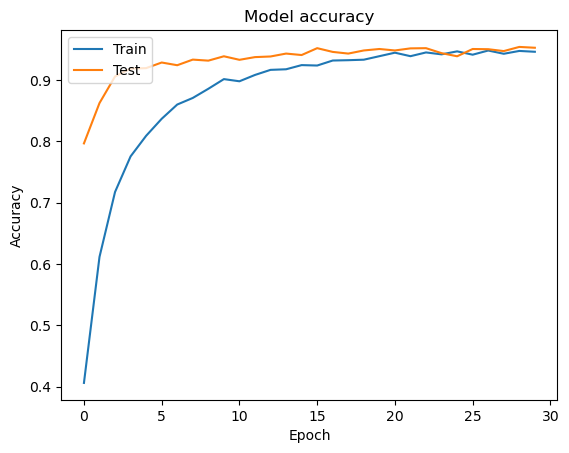

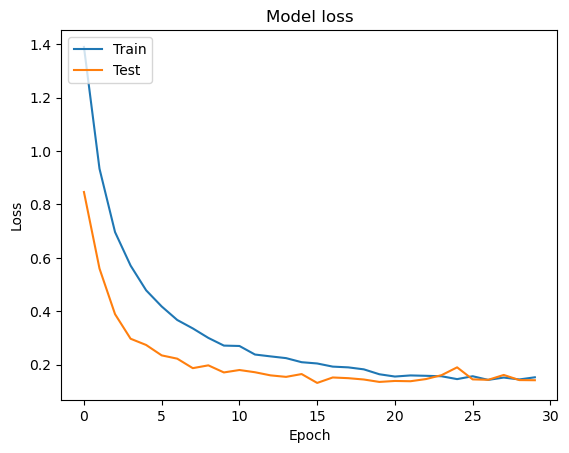

93/93 [==============================] - 0s 425us/step


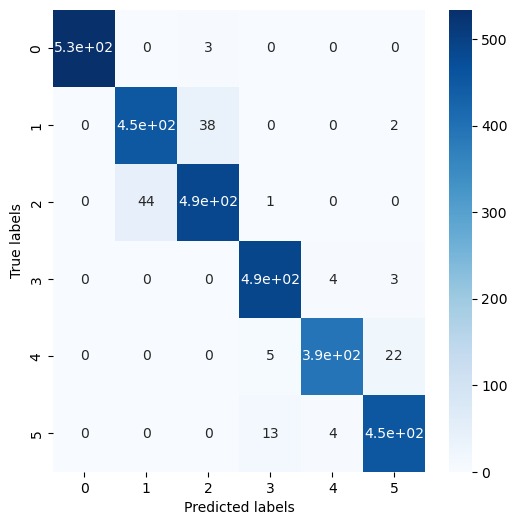

In [40]:
# plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Get predictions on test set
y_pred_onehot = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_onehot, axis=1)
y_pred = [label_map[label] for label in y_pred_encoded]
y_test_encoded = label_encoder.transform(y_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


#### Plotting the Confusion Matrix with Labels below

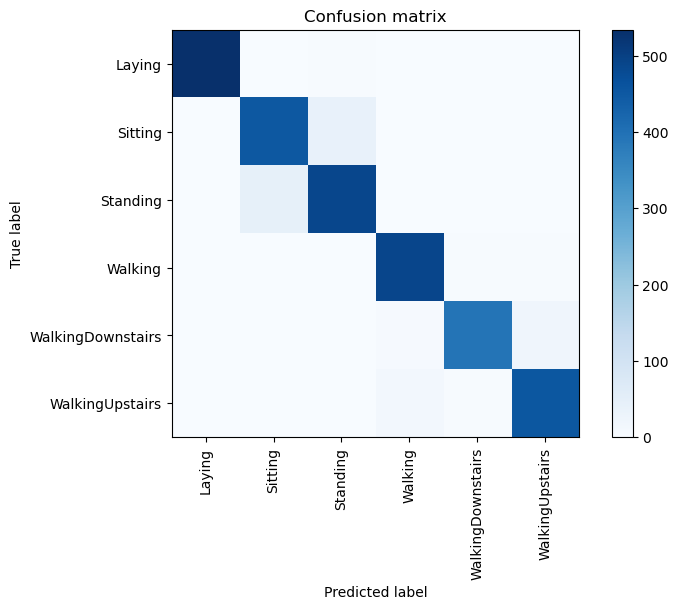

In [41]:
#plot a confusion matrix of y_test and y_pred
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Neural Network')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=90)
plt.yticks(tick_marks, label_encoder.classes_)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 2. Build a tree-based model (or a few) to do the same thing. Compare accuracy on the test set with that of Neural Networks.

In [10]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [42]:
# Define the models to be tuned
rf_model = RandomForestClassifier(random_state=123)

# Define the parameter grids to search over
rf_params = {
    'n_estimators': [100,200],
    'max_depth': [5,7],
    'min_samples_split': [2,3],
    'min_samples_leaf': [2,3],
}

# Define the grid search objects
rf_grid = GridSearchCV(rf_model, rf_params,cv=5, n_jobs=-1, verbose=1)

# Fit the grid search objects to the training data
rf_grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding validation scores
print("Random Forest best parameters:", rf_grid.best_params_)
print("Random Forest validation accuracy:", rf_grid.best_score_)

# Use the best models to predict on the test data and calculate the test accuracy
rf_model = rf_grid.best_estimator_

rf_accuracy = rf_model.score(X_test, y_test)

print("Random Forest test accuracy:", rf_accuracy)
cm2 = confusion_matrix(y_test, rf_model.predict(X_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest best parameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest validation accuracy: 0.9140421851949482
Random Forest test accuracy: 0.9039701391245334


In [48]:
# Define the models to be tuned
tree = DecisionTreeClassifier(random_state=123)

# Define the parameter grids to search over
tree_params = {
    'max_depth': [30,25],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
}

# Define the grid search objects
tree_grid = GridSearchCV(tree, tree_params,cv=5, n_jobs=-1, verbose=1)

# Fit the grid search objects to the training data
tree_grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding validation scores
print("Random Forest best parameters:", tree_grid.best_params_)
print("Random Forest validation accuracy:", tree_grid.best_score_)

# Use the best models to predict on the test data and calculate the test accuracy
tree_model = tree_grid.best_estimator_

tree_accuracy = tree_model.score(X_test, y_test)

print("Random Forest test accuracy:", tree_accuracy)
cm3 = confusion_matrix(y_test, tree_model.predict(X_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Random Forest best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
Random Forest validation accuracy: 0.8484872616619727
Random Forest test accuracy: 0.8635900916185952


In [50]:
xgb_model = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, alpha = 10)
param_grid = {'max_depth': [5],'n_estimators': [100],'learning_rate': [0.3]}
xgb_grid_search = GridSearchCV(xgb_model, param_grid, cv=5, verbose=0)
xgb_grid_search.fit(X_train, y_train)
xgb_model = xgb_grid_search.best_estimator_
print("XGBoost best parameters: ", xgb_grid_search.best_params_)
print("XGBoost validation accuracy: ", xgb_grid_search.best_score_)

xgb_model = xgb_grid_search.best_estimator_

xgb_accuracy = xgb_model.score(X_test, y_test)

print("XGBoost test accuracy:", xgb_accuracy)
cm4 = confusion_matrix(y_test, xgb_model.predict(X_test))

XGBoost best parameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}
XGBoost validation accuracy:  0.9249208969787779
XGBoost test accuracy: 0.9389209365456397


In [54]:
#Create a pretty table with the results - model, accuracy, confusion matrix, present the accuracy in 2 decimal places in percentage
x = PrettyTable()
x.field_names = ["Model", "Accuracy %", "Confusion Matrix"]
x.add_row(["Neural Network", round(accuracy*100,2), cm1])
x.add_row(["Random Forest", round(rf_accuracy*100,2), cm2])
x.add_row(["Decision Tree", round(tree_accuracy*100,2), cm3])
x.add_row(["XGBoost", round(xgb_accuracy*100,2), cm4])
print(x)

+----------------+------------+-----------------------------+
|     Model      | Accuracy % |       Confusion Matrix      |
+----------------+------------+-----------------------------+
| Neural Network |   95.28    |  [[534   0   3   0   0   0] |
|                |            |   [  0 451  38   0   0   2] |
|                |            |   [  0  44 487   1   0   0] |
|                |            |   [  0   0   0 489   4   3] |
|                |            |   [  0   0   0   5 393  22] |
|                |            |  [  0   0   0  13   4 454]] |
| Random Forest  |    90.4    |  [[537   0   0   0   0   0] |
|                |            |   [  0 420  71   0   0   0] |
|                |            |   [  0  57 475   0   0   0] |
|                |            |   [  0   0   0 481  10   5] |
|                |            |   [  0   0   0  36 337  47] |
|                |            |  [  0   0   0  51   6 414]] |
| Decision Tree  |   86.36    |  [[537   0   0   0   0   0] |
|       

#### Neural Network model and Tree-based models Confusion Matrix comparison

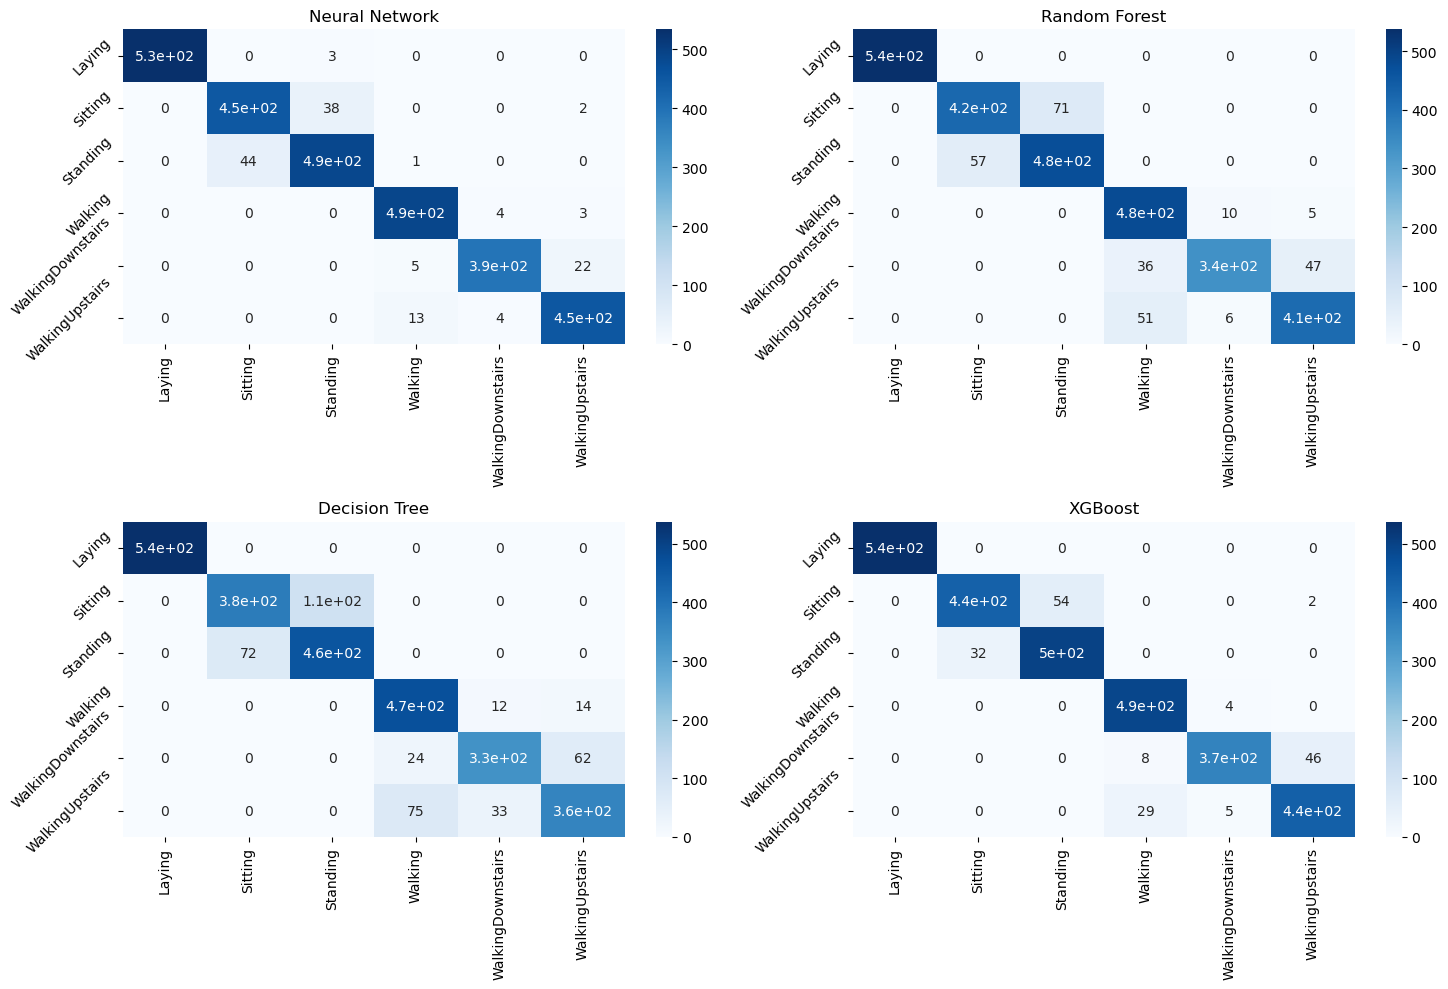

In [58]:
#sns plot the confusion matrix for all four models in subplots 2x2
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.heatmap(cm1, annot=True, cmap='Blues', ax=ax[0,0])
sns.heatmap(cm2, annot=True, cmap='Blues', ax=ax[0,1])
sns.heatmap(cm3, annot=True, cmap='Blues', ax=ax[1,0])
sns.heatmap(cm4, annot=True, cmap='Blues', ax=ax[1,1])
ax[0,0].set_title('Neural Network')
ax[0,1].set_title('Random Forest')
ax[1,0].set_title('Decision Tree')
ax[1,1].set_title('XGBoost')
#set the x and y ticks to the labels
ax[0,0].set_xticklabels(label_encoder.classes_)
ax[0,0].set_yticklabels(label_encoder.classes_)
ax[0,1].set_xticklabels(label_encoder.classes_)
ax[0,1].set_yticklabels(label_encoder.classes_)
ax[1,0].set_xticklabels(label_encoder.classes_)
ax[1,0].set_yticklabels(label_encoder.classes_)
ax[1,1].set_xticklabels(label_encoder.classes_)
ax[1,1].set_yticklabels(label_encoder.classes_)
#rotate the x ticks
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)
#rotate the y ticks 45 degrees
ax[0,0].tick_params(axis='y', rotation=45)
ax[0,1].tick_params(axis='y', rotation=45)
ax[1,0].tick_params(axis='y', rotation=45)
ax[1,1].tick_params(axis='y', rotation=45)
#put some space between the subplots
fig.tight_layout()
plt.show()

> Among all the models we see that the main confusion is between sitting and Standing & between Walking and Walking Upstiars/Downstairs, with most incorrect classifications being between these four classes. This is not surprising, as the pair of these two classes are very similar in terms of the features used to classify them. <br>
>
> Furthermore, the Neural Network model has a higher accuracy than the tree-based models. This is not surprising, as Neural Networks are more powerful than tree-based models. However, the tree-based models are much easier to interpret and explain, which is important for many applications.
>
> The XGBoost model has the higest accuracy among the tree-based models, which is not surprising, as XGBoost is a very powerful and popular tree-based model. However, XGBoost is the most computationally expensive of the tree-based models in this case.
>
> The Keras Sequential API gave good results relative to how computationally expensive it is.
>
> The Decision Tree model is the least computationally expensive of the tree-based models, but it has the lowest accuracy. This is not surprising, as Decision Trees are relatively simple models that are prone to overfitting. However, they are very easy to interpret and explain, which is important for many applications.